# Values Communication in Conservation Nonprofits

In the future, I am interested in improving science communication to the public in order to increase public engagement and make science more accessible. I see nonprofits as organizations with a lot of potential when it comes to interfacing with the public. Additionally, they offer unique opportunities to engage individuals in causes they believe in. Communication and linguistics plays an important role when appealing to audiences or customers, and I am particularly interested in how the values of an organization affects the customers or audiences it attracts. 

I want to compare conservation nonprofit mission, vision, and values as well as social media content (via Tweets) to the Schwartz values theory, which suggests there are ten basic values in society: self-direction, stimulation, hedonism, achievement, power, security, tradition, conformity, benevolence, and universalism. The reason I want to look at both mission, vision, and values statements along with tweets is because I want to see what an organization says they want to accomplish in their mission versus what they are portraying to the public via social media as more individuals keep track of nonprofit work through social media.

Jones et al. (2018) use these values in their paper, "Liberal and Conservative Values: What We Can Learn from Congressional Tweets." In order to analyze the values embedded in the tweets of Congress members, they created a list of synonyms for each of the ten values and removed any that could belong in multiple value categories. To account for language on social media, they also sorted the most common words Congress members used in tweets and validated which category they belonged in by asking independent raters to sort language into each of the ten values.

For my acquire and analyze project, I pulled mission, vision, and values statements for twenty prominant conservation nonprofits and wrote them to a text file so they would be easier to analyze. Then, I looked at the most common words found in mission, vision, and values statements and created frequency distributions. After looking at mission, vision, and values statements, I also pulled tweets from each nonprofit and wrote them to a text file as well. I followed a similar process in looking at the most common words used in tweets so I could compare the general language they were using.

After looking at most common words, I looked at values specifically. I created a dictionary that contained a list of synonyms for each value in my previous dataset share, and wrote each synonym list to a text file. For my acquire and analyze, I read in these text files to a new dictionary that I used to identify values embedded in tweet files and mission, vision, and values files.


Paper that I based my values dictionary and methods on:

Jones, K. L., Noorbaloochi, S., Jost, J. T., Bonneau, R., Nagler, J., & Tucker, J. A. (2018). Liberal and conservative values: What we can learn from congressional tweets. Political Psychology, 39(2), 423-443.

In [1]:
import requests  # To get the pages
from bs4 import BeautifulSoup # and to process them
from bs4.element import Comment

from time import sleep      # Allowing us to pause between pulls
from random import random   # And allowing that pause to be random

import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk import FreqDist

import tweepy
from MD_API_Keys import api_key, api_key_secret, access_token, access_token_secret

sw = stopwords.words("english")

In [2]:
##Authenticating tweepy
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# Scraping Nonprofit Mission/Vision/Values

I will use web scraping to attain the mission/vision/values statements from 20 conservation nonprofits. Most often, this information is found on an 'About Us' page. I manually visited each nonprofit's website to confirm that I was pulling from the correct web pages. 

In [3]:
##functions used for scraping code

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True



##Creating a file name for each URL from the nonprofits
def generate_filename_from_url(url) :
    
    if not url :
        return None
    
    # drop the http or https
    name = url.replace("https","").replace("http","")

    # Replace useless chareacters with UNDERSCORE
    name = name.replace("://","").replace(".","_").replace("/","_")
    
    # remove last underscore
    last_underscore_spot = name.rfind("_")
    
    name = name[:last_underscore_spot] + name[(last_underscore_spot+1):]

    # tack on .txt
    name = name + ".txt"
    
    return(name)




In [4]:
##Creating a dictionary to store the links to each nonprofit's mission/vision/values statements

nonprofit_pages = dict()

nonprofit_pages["about_us"] = """
https://www.rmef.org/how-we-conserve/
https://www.backcountryhunters.org/mission_and_values
https://www.sierraclub.org/our-vision
https://www.boone-crockett.org/snapshot-boone-and-crockett-club
https://www.worldwildlife.org/initiatives
https://www.nature.org/en-us/about-us/who-we-are/our-mission-vision-and-values/
https://www.defenders.org/about
https://www.oceanconservancy.org/about/
https://www.ducks.org/conservation/how-du-conserves-wetlands-and-waterfowl
https://www.tu.org/conservation/our-approach/
https://www.ecologyproject.org/our-story
https://www.oceana.org/what-we-do
https://www.wcs.org/our-work
https://www.pheasantsforever.org/SpecialPages/About-Pages/About-PF.aspx
https://www.ipcc.ch/about
https://www.janegoodall.org/about/
https://www.greenpeace.org/international/explore/about/
https://www.conservation.org/about
https://www.audubon.org/about
https://www.nrdc.org/about
""".split()


In [5]:
##Pulling the webpage and storing in text file
for page in nonprofit_pages :  
    for link in nonprofit_pages[page] : 
        output_file_name = generate_filename_from_url(link) #Using the function created above, create a file name
        
        # pull the page 
        try:
            r = requests.get(link)
        except :
            pass
        
        # process the page if r status code is 200 (successful pull)
        if r.status_code == 200:
            soup = BeautifulSoup(r.text, 'html.parser')
            texts=soup.findAll(text=True)
            visible_texts = filter(tag_visible, texts)
        
        
        # write out the page to a file with the appropriate name
        with open(output_file_name,'w',encoding = "UTF-8") as outfile :
            outfile.write(" ".join(t.strip() for t in visible_texts))
            
    # Pause for a bit
    wait_time = 5 + random()*10
    print(f"Waiting for {wait_time:.02f} seconds.")
        
    sleep(wait_time)

Waiting for 5.47 seconds.


In [6]:
##Storing each file in a list

MVV_files = ["www_worldwildlife_orginitiatives.txt",  #World Wildlife Federation
            "www_wcs_orgour-work.txt", #Wildlife Conservation Society
            "www_tu_org_conservation_our-approach.txt", #Trout Unlimited
            "www_sierraclub_orgour-vision.txt", #Sierra Club
            "www_rmef_org_how-we-conserve.txt", #Rocky Mountain Elk Foundation
            "www_pheasantsforever_org_SpecialPages_About-Pages_About-PFaspx.txt", #Pheasants Forever
            "www_oceanconservancy_org_about.txt", #Ocean Conservancy
            "www_oceana_orgwhat-we-do.txt",  #Oceana
            "www_nrdc_orgabout.txt", #Natural Resources Defense Council
            "www_nature_org_en-us_about-us_who-we-are_our-mission-vision-and-values.txt", #The Nature Conservancy
            "www_janegoodall_org_about.txt", #Jane Goodall Institute
            "www_ipcc_chabout.txt", #International Panel on Climate Change
            "www_greenpeace_org_international_explore_about.txt", #Greenpeace
            "www_ecologyproject_orgour-story.txt", #Ecology Project 
            "www_ducks_org_conservationhow-du-conserves-wetlands-and-waterfowl.txt", #Ducks Unlimited
            "www_defenders_orgabout.txt", #Defenders of Wildlife
            "www_conservation_orgabout.txt", #Conservation International
            "www_boone-crockett_orgsnapshot-boone-and-crockett-club.txt", #Boone and Crockett Club
            "www_backcountryhunters_org_mission_andvalues.txt", #Backcountry Hunters and Anglers
            "www_audubon_orgabout.txt" #The Audubon Society
            ]

In [7]:
##Creating a for loop that uses Counter to look at some of the most common words for each nonprofit's about us page

for file in MVV_files:   ##Tokenize each file and add clean tokens to a list
    nonprofit = open(file, "r", encoding="Latin-1")
    nonprofit_mission = nonprofit.read()
    mission_tokens = nltk.word_tokenize(nonprofit_mission)
    
    clean_nonprofit_tokens = []
    
    for tokens in mission_tokens:
        if tokens not in sw and tokens.isalpha():
            clean_nonprofit_tokens.append(tokens.lower())
    
    MVV_common_words = Counter(clean_nonprofit_tokens).most_common(20)
    
    print("The most common words for" + " " + file + " " + "are" + "\n" + str(MVV_common_words) + "\n\n")

The most common words for www_worldwildlife_orginitiatives.txt are
[('work', 16), ('wwf', 13), ('conservation', 11), ('our', 11), ('people', 10), ('toggle', 8), ('wildlife', 8), ('view', 8), ('partnerships', 8), ('nature', 8), ('make', 7), ('dropdown', 6), ('links', 6), ('we', 6), ('every', 6), ('adopt', 5), ('world', 5), ('search', 5), ('places', 5), ('species', 5)]


The most common words for www_wcs_orgour-work.txt are
[('wildlife', 30), ('we', 16), ('conservation', 13), ('our', 11), ('act', 11), ('now', 11), ('wild', 9), ('places', 9), ('wcs', 7), ('science', 7), ('communities', 7), ('protect', 7), ('us', 6), ('policy', 6), ('priority', 5), ('solutions', 5), ('zoo', 5), ('health', 5), ('work', 5), ('stand', 5)]


The most common words for www_tu_org_conservation_our-approach.txt are
[('conservation', 29), ('trout', 23), ('tu', 12), ('coldwater', 12), ('find', 12), ('our', 11), ('donate', 11), ('fishing', 10), ('get', 10), ('unlimited', 9), ('stream', 8), ('membership', 8), ('local'

Many organizations use words in the mission, vision, and values statements that seem 'obvious' to those familiar with an organization already, but are helpful to anyone looking to learn more about what an organization is about. For example, Pheasants Forever mentions 'pheasants', 'wildlife', and 'conservation'. The Boone and Crockett Club mentions 'wildlife', 'conservation', 'hunting', and 'management'. The Audubon Society references forms of the word 'bird' very often along with 'conservation'. Additionally, the Natural Resources Defense Council (an organization I was previously unfamiliar with) uses the words 'clean', 'policy', 'air', and 'action', which makes sense because I learned it was started by law students and attorneys who wanted to provide policy resources to their followers. Backcountry Hunters and Anglers mentioned the words 'wild', 'water', 'wilderness', 'hunters', 'public', and 'access'. Ducks Unlimited also had common tokens in their mission/vision/values statements that seem to represent what I know the organization to be about: 'conservation', 'habitat', 'waterfowl', 'landowners', and 'wetland'.

However, there are also some interesting results that stand out.

The Wildlife Conservation Society has some expected results, such as 'wildlife' and 'conservation' being in its top words, likely due to referencing the organization's name often. However, they also include words like 'science', 'communities', and 'policy' that I think are other important 'indicator words' that can represent the values of an organization.

Oceana often references words like 'campaigns', 'seafood', and 'protein'. Without their collection of mission/vision/values statements, I would assume that part of their work revolves around the seafood industry as an important industry that has the potential to be more sustainable.

Another thing that I found interesting was how some organizations referenced their organization name a lot whereas others had other words appear more often. For example, Ducks Unlimited, Boone and Crockett Club, and Trout Unlimited were among the few oganizations that had most common tokens that weren't their organization name. 

Knowing the most common tokens in an organization's mission, vision, and values statements could make it easy to categorize them. For example, some organizations include words like 'climate' and 'change' very often while others do not. The International Panel on Climate Change has common tokens that include 'climate', 'change', 'assessment', 'impacts', 'mitigation', and 'adaptation'. On the other hand, organizations like Ducks Unlimited, Trout Unlimited, and Defenders of Wildlife do not mention any of these tokens. Other organizations have some form of the word 'hunt' in their most common tokens, such as Boone and Crockett Club, Rocky Mountain Elk Foundation, and Backcountry Hunters and Anglers. Even if someone didn't know much about these organizations, it is a good inference that hunting plays a role in their missions.



The frequency distribution for common words in www_worldwildlife_orginitiatives.txt is



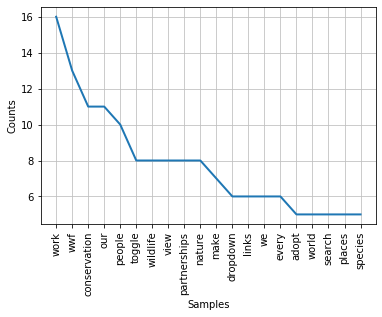


The frequency distribution for common words in www_wcs_orgour-work.txt is



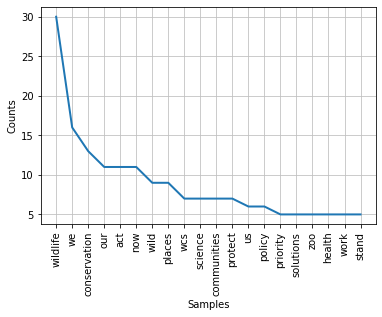


The frequency distribution for common words in www_tu_org_conservation_our-approach.txt is



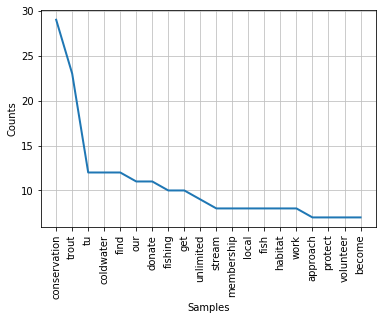


The frequency distribution for common words in www_sierraclub_orgour-vision.txt is



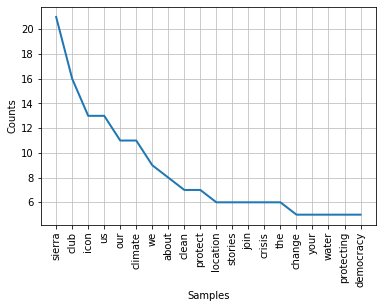


The frequency distribution for common words in www_rmef_org_how-we-conserve.txt is



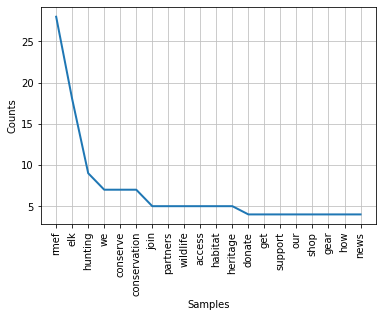


The frequency distribution for common words in www_pheasantsforever_org_SpecialPages_About-Pages_About-PFaspx.txt is



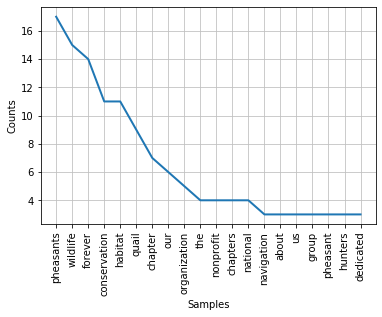


The frequency distribution for common words in www_oceanconservancy_org_about.txt is



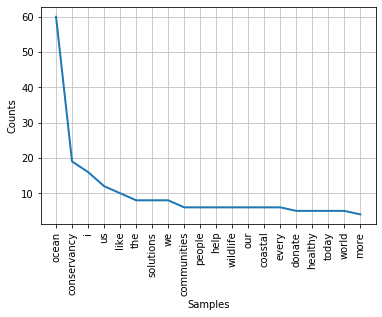


The frequency distribution for common words in www_oceana_orgwhat-we-do.txt is



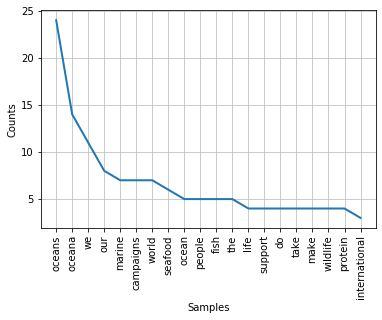


The frequency distribution for common words in www_nrdc_orgabout.txt is



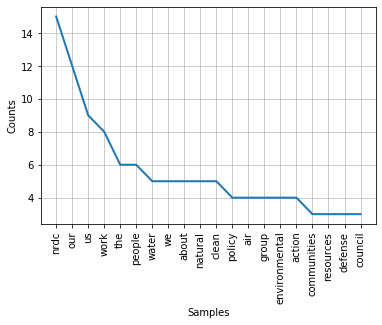


The frequency distribution for common words in www_nature_org_en-us_about-us_who-we-are_our-mission-vision-and-values.txt is



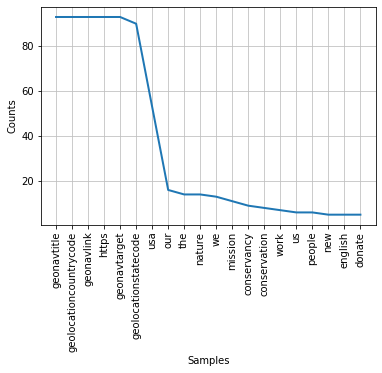


The frequency distribution for common words in www_janegoodall_org_about.txt is



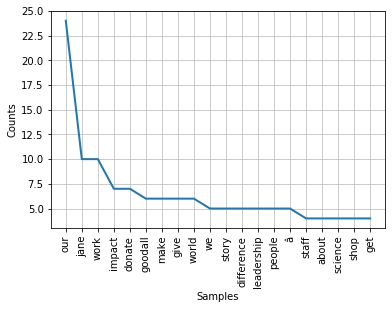


The frequency distribution for common words in www_ipcc_chabout.txt is



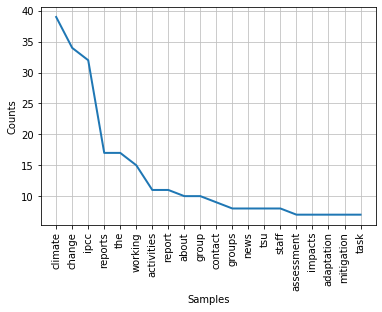


The frequency distribution for common words in www_greenpeace_org_international_explore_about.txt is



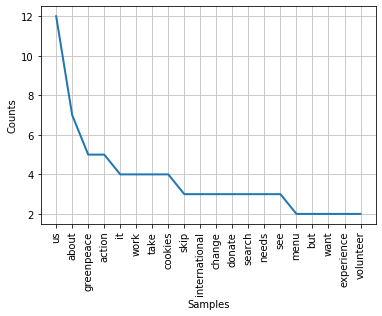


The frequency distribution for common words in www_ecologyproject_orgour-story.txt is



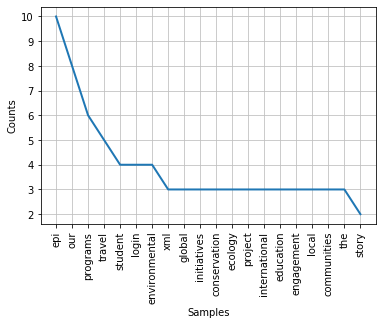


The frequency distribution for common words in www_ducks_org_conservationhow-du-conserves-wetlands-and-waterfowl.txt is



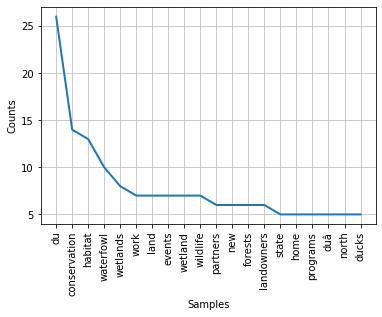


The frequency distribution for common words in www_defenders_orgabout.txt is



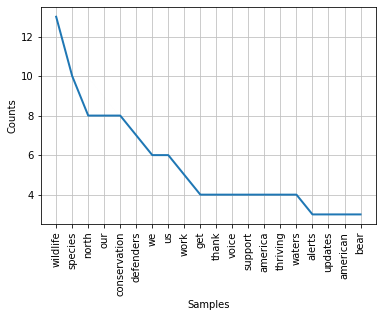


The frequency distribution for common words in www_conservation_orgabout.txt is



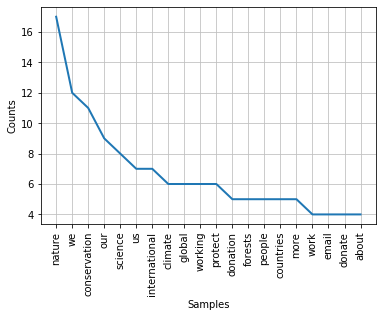


The frequency distribution for common words in www_boone-crockett_orgsnapshot-boone-and-crockett-club.txt is



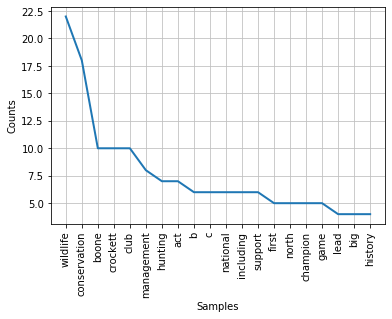


The frequency distribution for common words in www_backcountryhunters_org_mission_andvalues.txt is



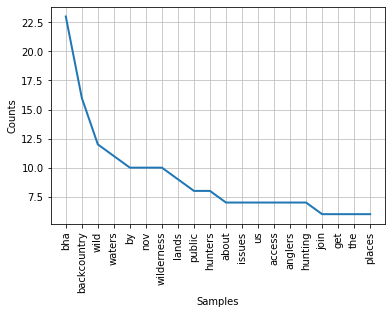


The frequency distribution for common words in www_audubon_orgabout.txt is



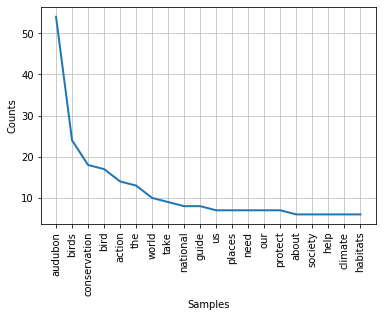

In [8]:
##Creating a frequency distribution for each

for file in MVV_files:
    nonprofit = open(file, "r", encoding="Latin-1")
    nonprofit_mission = nonprofit.read()
    mission_tokens = nltk.word_tokenize(nonprofit_mission)
    
    clean_nonprofit_tokens = []
    
    for tokens in mission_tokens:
        if tokens not in sw and tokens.isalpha():
            clean_nonprofit_tokens.append(tokens.lower())
            
    fdist = FreqDist(clean_nonprofit_tokens)
    
    print("\n" + "The frequency distribution for common words in" + " " + file + " " + "is" + "\n")
    
    fdist.plot(20)



The frequency distribution for all common words in mission/vision/values statements is:



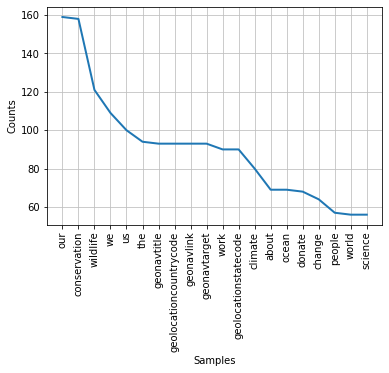

In [9]:
##Most common tokens overall

combined_MVV_tokens = []

for file in MVV_files:
    
    nonprofit = open(file, "r", encoding="Latin-1")
    nonprofit_mission = nonprofit.read()
    mission_tokens = nltk.word_tokenize(nonprofit_mission)
    
    
    
    for tokens in mission_tokens:
        if tokens not in sw and tokens.isalpha() and tokens != 'https': #Removing irrelevant tokens that appear
            combined_MVV_tokens.append(tokens.lower())

fdist = FreqDist(combined_MVV_tokens)
    
print("The frequency distribution for all common words in mission/vision/values statements is:" + "\n")
    
fdist.plot(20)


In [10]:
##Printing out the most common words
Counter(combined_MVV_tokens).most_common(20)

[('our', 159),
 ('conservation', 158),
 ('wildlife', 121),
 ('we', 109),
 ('us', 100),
 ('the', 94),
 ('geonavtitle', 93),
 ('geolocationcountrycode', 93),
 ('geonavlink', 93),
 ('geonavtarget', 93),
 ('work', 90),
 ('geolocationstatecode', 90),
 ('climate', 80),
 ('about', 69),
 ('ocean', 69),
 ('donate', 68),
 ('change', 64),
 ('people', 57),
 ('world', 56),
 ('science', 56)]

The words 'our' and 'conservation' were nearly tied as the most common words in mission/vision/values statements. I found it interesting that collective words such as 'we' and 'us' were also in the list of top words. Additionally, I think it's important to note that global terms like 'climate' and 'world' were included in many mission statements. Finally, as a wildlife biology student, I thought it was cool that the word 'science' also made it in the top list of words.

There was a number of strange tokens that popped up, including 'geolocationcountrycode', 'geonavtitle', 'geonavlink', and 'geonavtarget'. Upon investigation, these tokens all came from The Nature Conservancy's website for whatever reason. In the future, I'll remove the strange tokens before analysis.

# Pulling Conservation Nonprofit Tweets

For each of the twenty nonprofits I obtained mission/vision/values statements for, I also pulled up to 1000 tweets and stored them in a text file.

In [11]:
# Storing all twitter handles in a dictionary
user_dict = {'Backcountry_H_A': [],
             'RMEF': [],
             'BC_Club1887': [],
             'SierraClub': [],
             'OurOcean': [],
             'DucksUnlimited': [],
             'TroutUnlimited': [],
             'Defenders': [],
             'World_Wildlife': [],
             'nature_org': [],
             'audubonsociety': [],
             'Greenpeace': [],
             'NRDC': [],
             'IPCC_CH': [],
             'pheasants4ever': [],
             'ConservationOrg': [],
             'JaneGoodallInst': [],
             'TheWCS': [],
             'oceana': [],
             'ecologyproject': []
             
            }

In [12]:
#Creating a for loop to pull 1000 tweets form each nonprofit and store them in a text file
for nonprofit in user_dict.keys():

    # Writing a text file to store tweets
    with open(f'{nonprofit}_tweets.txt','w', encoding='utf-8') as out_file:
        count = 1000
        tweets = tweepy.Cursor(api.user_timeline,id=nonprofit).items(count)
        tweets_list = [[tweet.text] for tweet in tweets] 
        out_file.write(str(tweets_list))

In [13]:
##Storing Tweet Text Files

nonprofit_tweet_files = ["Backcountry_H_A_tweets.txt",
                         "BC_Club1887_tweets.txt",
                         "Defenders_tweets.txt",
                         "DucksUnlimited_tweets.txt",
                         "nature_org_tweets.txt",
                         "OurOcean_tweets.txt",
                         "RMEF_tweets.txt",
                         "SierraClub_tweets.txt",
                         "TroutUnlimited_tweets.txt",
                         "World_Wildlife_tweets.txt",
                         "NRDC_tweets.txt",
                         "audubonsociety_tweets.txt",
                         "Greenpeace_tweets.txt",
                         "IPCC_CH_tweets.txt",
                         "JaneGoodallInst_tweets.txt",
                         "ConservationOrg_tweets.txt",
                         "pheasants4ever_tweets.txt",
                         "oceana_tweets.txt",
                         "TheWCS_tweets.txt",
                         "ecologyproject_tweets.txt"]

In [14]:
## Looking at the twenty most common tokens in tweets for each nonprofit
for file in nonprofit_tweet_files:
    nonprofit = open(file, "r", encoding="Latin-1")
    nonprofit_tweets = nonprofit.read()
    tweet_tokens = nltk.word_tokenize(nonprofit_tweets)
    
    clean_nonprofit_tokens = []
    
    for tokens in tweet_tokens:
        if tokens not in sw and tokens.isalpha() and tokens != 'https' and tokens != 'amp': ##Removing irrelevant tokens that appear
            clean_nonprofit_tokens.append(tokens.lower())
            
    tweet_common_words = Counter(clean_nonprofit_tokens).most_common(20)
    
    
    print("The most common words for" + " " + file + " " + "are" + "\n" + str(tweet_common_words) + "\n\n")

The most common words for Backcountry_H_A_tweets.txt are
[('public', 158), ('land', 100), ('lands', 98), ('bha', 94), ('act', 91), ('lwcf', 90), ('thank', 80), ('great', 77), ('support', 73), ('we', 66), ('conservation', 63), ('supporting', 61), ('american', 59), ('water', 57), ('the', 55), ('outdoors', 53), ('across', 52), ('funding', 50), ('publiclandowner', 49), ('us', 44)]


The most common words for BC_Club1887_tweets.txt are
[('hunting', 392), ('http', 290), ('conservation', 276), ('fairchase', 180), ('crockett', 179), ('in', 108), ('field', 107), ('b', 95), ('c', 93), ('booneandcrockettclub', 70), ('boone', 44), ('club', 43), ('big', 37), ('booneandcrockett', 37), ('game', 36), ('book', 32), ('new', 31), ('trophywatch', 31), ('wildlife', 30), ('the', 26)]


The most common words for Defenders_tweets.txt are
[('wildlife', 156), ('the', 81), ('species', 76), ('habitat', 70), ('protect', 64), ('conservation', 60), ('us', 59), ('wolves', 59), ('we', 49), ('administration', 49), ('ne

Some common word lists for tweets were pretty standard. For example, RMEF tweets were as expected, with 'elk' as the most common and lots of hunting references. Audubon Society talked a lot about birds and IPCC talked a lot about 'climate' and 'report'. However, there were plenty of interesting standouts that could be telling of an organization.

One thing I found really interesting was that 'public' was by far the most common tweet token for BHA, floowed by 'land' and 'lands'. 'Lwcf' is also a timely token to show up in the most common words list for tweets. 

Boone and Crockett Club mentioned 'hunting' a lot in their tweets, followed by 'conservation' and 'fairchase'. They also used the token 'trophywatch', which makes sense because they may focus more on measuring trophy animals than other organizations used in analysis. 

Defenders of Wildlife used the word 'wildlife' a lot in their tweets, which is fairly expected. However, I found it interesting that 'wolves' and 'administration' also appeared in most common words. This could indicate that they are currently focusing a lot on wolves as a hot topic issue as well as putting pressure/criticism on current administration.

The Nature Conservancy talked about 'climate' and 'food' a lot. 'Food' was interesting because not many other organizations focused on food. Additionally, they use a lot of global terms like 'planet', 'world', 'global', and 'us'/'we'

Sierra Club talked about 'climate' the most. 'vote' also appeared in the top words, which makes sense given the time of year. Also, I found it interesting that 'trump' appeared in the most common words, since this didn't happen with any other organization.

The Natural Resources Defense Council talked most about 'climate' and 'communitites', which I thought was cool. They also mention 'health', 'vote', 'energy', and 'air' more than many other nonprofits. Finally, they were one of the only organizations that had 'indigenous' in their list of most common words for tweets. Conservation International was the only other that talked about 'indigenous'.

Oceana mentioned 'marine', 'sea', 'plastic'. They also mention specific animals more than other nonprofits: 'sharks', 'whales', and 'turtles' appear in the list of most common words.

Ecology Project International used 'science' most often. One common word unique to EPI was 'students', which could indicate a larger focus on engaging students in their work. Additionally, they mention 'women', 'galapagos', and 'scientists' often.


The frequency distribution for common words in Backcountry_H_A_tweets.txt is



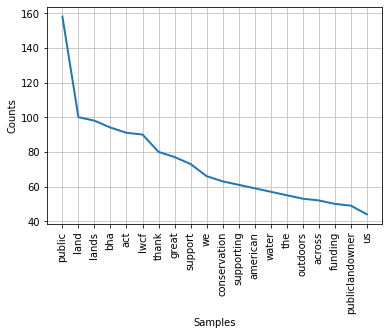


The frequency distribution for common words in BC_Club1887_tweets.txt is



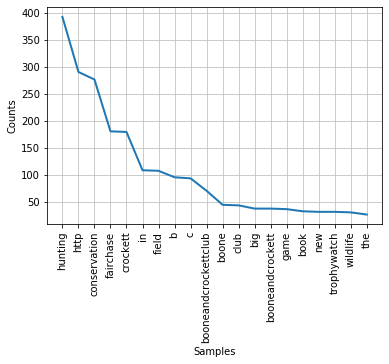


The frequency distribution for common words in Defenders_tweets.txt is



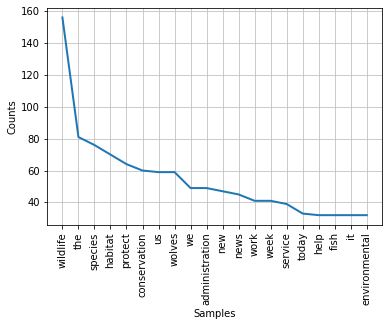


The frequency distribution for common words in DucksUnlimited_tweets.txt is



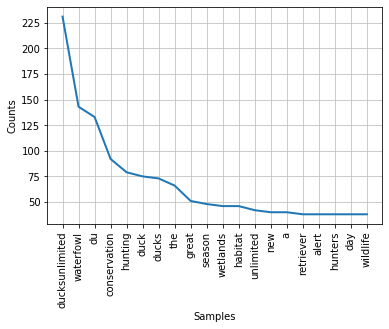


The frequency distribution for common words in nature_org_tweets.txt is



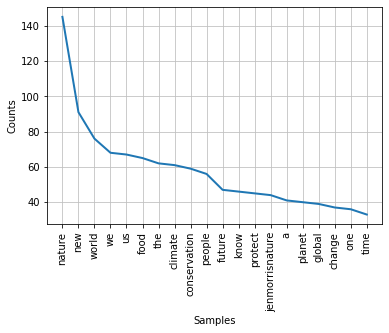


The frequency distribution for common words in OurOcean_tweets.txt is



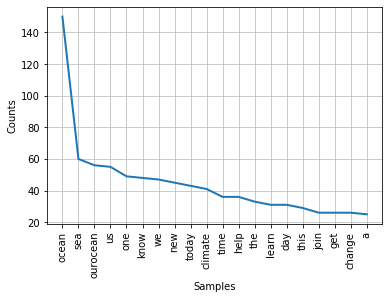


The frequency distribution for common words in RMEF_tweets.txt is



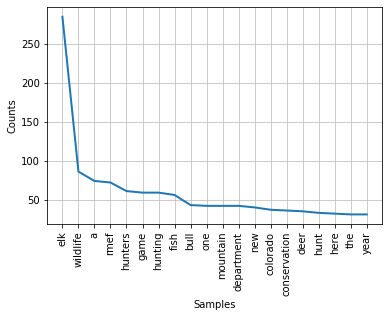


The frequency distribution for common words in SierraClub_tweets.txt is



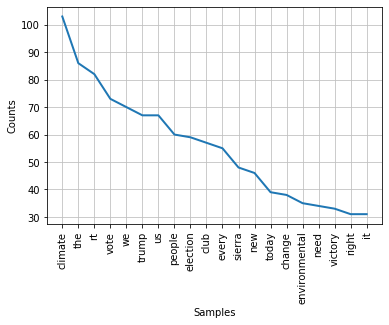


The frequency distribution for common words in TroutUnlimited_tweets.txt is



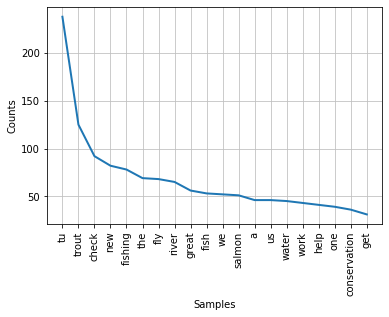


The frequency distribution for common words in World_Wildlife_tweets.txt is



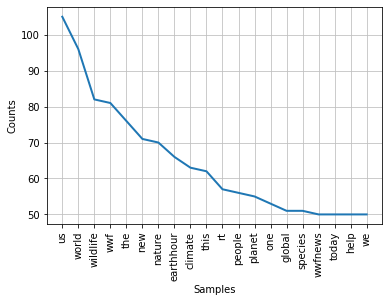


The frequency distribution for common words in NRDC_tweets.txt is



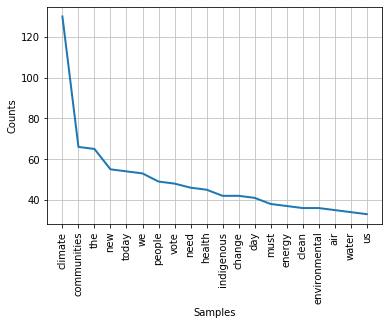


The frequency distribution for common words in audubonsociety_tweets.txt is



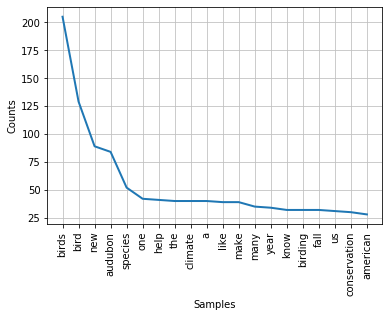


The frequency distribution for common words in Greenpeace_tweets.txt is



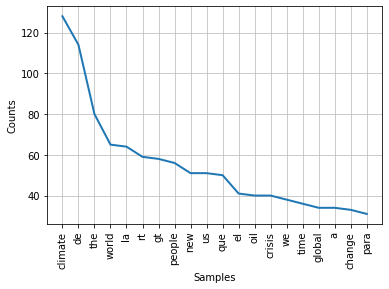


The frequency distribution for common words in IPCC_CH_tweets.txt is



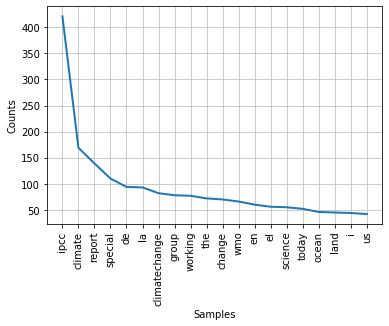


The frequency distribution for common words in JaneGoodallInst_tweets.txt is



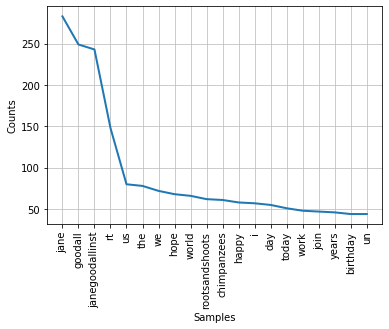


The frequency distribution for common words in ConservationOrg_tweets.txt is



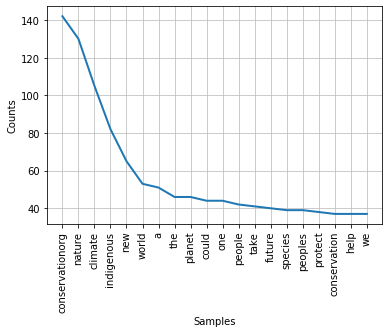


The frequency distribution for common words in pheasants4ever_tweets.txt is



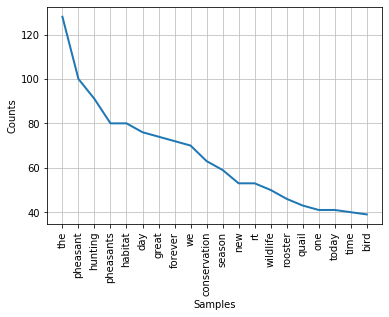


The frequency distribution for common words in oceana_tweets.txt is



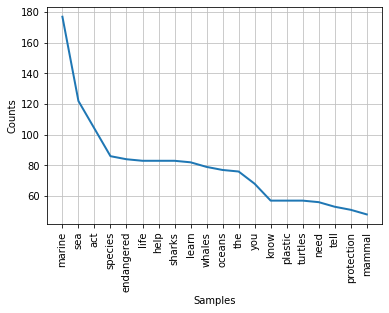


The frequency distribution for common words in TheWCS_tweets.txt is



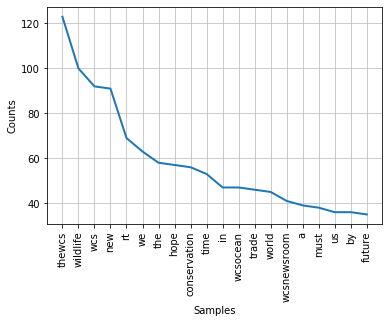


The frequency distribution for common words in ecologyproject_tweets.txt is



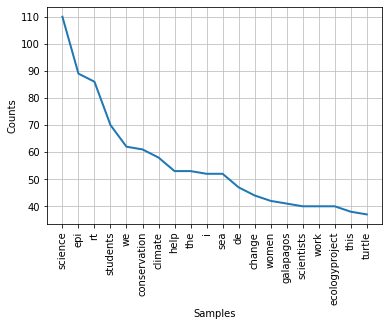

In [15]:
##Creating a frequency distribution for each

for file in nonprofit_tweet_files:
    
    nonprofit = open(file, "r", encoding="Latin-1")
    nonprofit_tweets = nonprofit.read()
    tweet_tokens = nltk.word_tokenize(nonprofit_tweets)
    
    clean_nonprofit_tokens = []
    
    for tokens in tweet_tokens:
        if tokens not in sw and tokens.isalpha() and tokens != 'https' and tokens != 'amp': #Removing irrelevant tokens that appear
            clean_nonprofit_tokens.append(tokens.lower())
            
    fdist = FreqDist(clean_nonprofit_tokens)
    
    print("\n" + "The frequency distribution for common words in" + " " + file + " " + "is" + "\n")
    
    fdist.plot(20)



The frequency distribution for all common words in tweets is:



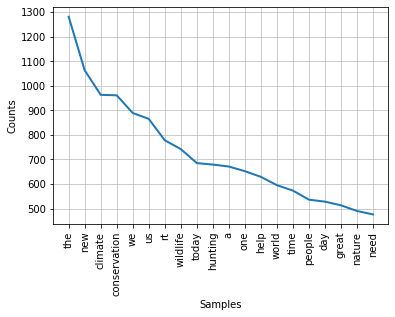

In [16]:
##Combined Tokens Frequency Distribution

combined_tweet_tokens = []

for file in nonprofit_tweet_files:
    nonprofit = open(file, "r", encoding="Latin-1")
    nonprofit_tweets = nonprofit.read()
    tweet_tokens = nltk.word_tokenize(nonprofit_tweets)
    
    
    
    for tokens in tweet_tokens:
        if tokens not in sw and tokens.isalpha() and tokens != 'https' and tokens != 'amp': #Removing irrelevant tokens that appear
            combined_tweet_tokens.append(tokens.lower())
            
fdist = FreqDist(combined_tweet_tokens)
    
print("The frequency distribution for all common words in tweets is:" + "\n")
    
fdist.plot(20)




In [17]:
##Listing out the most common words in tweets

Counter(combined_tweet_tokens).most_common(20)


[('the', 1281),
 ('new', 1063),
 ('climate', 963),
 ('conservation', 961),
 ('we', 889),
 ('us', 865),
 ('rt', 778),
 ('wildlife', 742),
 ('today', 685),
 ('hunting', 679),
 ('a', 671),
 ('one', 652),
 ('help', 629),
 ('world', 595),
 ('time', 573),
 ('people', 536),
 ('day', 528),
 ('great', 513),
 ('nature', 490),
 ('need', 476)]

A large portion of tweets included 'climate' and 'conservation'. 'Wildlife' also made it into the list of most used tokens. It surprised me that 'hunting' still made it into the most common words list because there were lesss organizations that mentioned hunting in their mission/vision/values statements. I also found it interesting that potential calls to action were mentioned so often, such as: 'today', 'help', 'need', and 'time'. 

# Initial Comparison of Mission/Vision/Values and Tweets


__Combined Mission/Vision/Values Tokens__

('our', 159),
 ('conservation', 158),
 ('wildlife', 121),
 ('we', 109),
 ('us', 100),
 ('the', 94),
 ('geonavtitle', 92),
 ('geolocationcountrycode', 92),
 ('geonavlink', 92),
 ('geonavtarget', 92),
 ('work', 90),
 ('geolocationstatecode', 90),
 ('climate', 80),
 ('donate', 69),
 ('about', 69),
 ('ocean', 69),
 ('change', 64),
 ('people', 57),
 ('world', 56),
 ('science', 56)

__Combined Tweet Tokens__

('the', 1281),
 ('new', 1063),
 ('climate', 974),
 ('conservation', 950),
 ('we', 877),
 ('us', 868),
 ('rt', 774),
 ('wildlife', 742),
 ('today', 678),
 ('hunting', 677),
 ('a', 673),
 ('one', 636),
 ('help', 636),
 ('world', 590),
 ('time', 580),
 ('day', 541),
 ('people', 537),
 ('great', 517),
 ('need', 482),
 ('nature', 478)
 
 
The words 'conservation' and 'wildlife' appeared often in both mission/vision/values statements and tweets. Once word that was very common in tweets but not as common in mission/vision/values statements was the word 'climate'. The word 'hunting' also made up a large portion of tweets but was not in the list of most common words in mission/vision/values statements. Conversely, the word 'science' appears often in mission/vision/values statements but not in the list of 20 most common words in tweets.

One thing I noticed between the mission/vision/values and tweets of some organizations is that tweets were more influenced by current events. This could be an explanation for some organization's tweets not representing their mission/vision/values statements. For example, Backcountry Hunters and Anglers mentioned 'lwcf' often in their tweets even though it doesn't appear in their list of twenty most used tokens. While 'lwcf' (Land and Water Conservation Fund) may not be a literal part of BHA's mission statement, it is still important enough to the mission to mentioned very often in the organization's tweets.

The Sierra Club represents an organization that has tweet tokens that appear pretty different than mission/vision/values tokens. Sierra Club tweets often mention 'vote', 'trump', and 'election'. Between the Sierra Club's tweet and mission/vision/values tokens, the words 'climate' and 'change' appeared in both. Therefore, I would assume that climate change is a strong overarching focus in the organization. The Rocky Mountain Elk Foundation has mission/vision/values tokens that seem to reflect tweet tokens. For example, 'elk', 'wildlife', 'hunt*', and 'conserv*' appear in both lists.



# Looking at the Values Embedded in Mission/Vision/Values and Tweets

My next goal is to look into the values that come up the most in mission/vision/values statements and those that come up most in tweets. I created large text files of synonyms for Schwartz's ten basic human values in my third data set share, and this is what I will be basing my analysis off of.

In [18]:
##First I will read in the text files that contain all the values and their synonyms

values_files = ["achievement_synonyms.txt",
                "benevolence_synonyms.txt",
                "conformity_synonyms.txt",
                "hedonism_synonyms.txt",
                "power_synonyms.txt",
                "security_synonyms.txt",
                "self_direction_synonyms.txt",
                "stimulation_synonyms.txt",
                "tradition_synonyms.txt",
                "universalism_synonyms.txt"]

values_dict=dict()

for file in values_files: #For each text file
    with open(file, "r", encoding = "Latin-1") as infile: #Read in and tokenize the file
        key=file.replace("_synonyms.txt", "")
        words=infile.read()
        tokens=nltk.word_tokenize(words)
        
        values_dict[key] = set(t for t in tokens if t.isalpha()) #Add the list of synonyms into the dictionary using the overarching value as the key

The function below will allow me to indicate a file, and then the function will count the number of values synonyms that appear in the text file. The result should be an output of each value in the values dictionary and how often it appears in the file I indicate.
    

In [19]:
def identify_values(file,v):  #Function will open a file, tokenize it, and store clean tokens in a list
    
    results=dict() #results will be stored in a dictionary
    
    open_file = open(file, "r", encoding = "Latin-1")
    
    read_file = open_file.read()
    
    tokenize_file = nltk.word_tokenize(read_file)
    
    clean_tokens = []
    
    for tokens in tokenize_file:
        if tokens not in sw and tokens.isalpha():
            clean_tokens.append(tokens.lower())
            
    for value,words in v.items():  #for each key and synonym pair in the value dictionary
        
        matching_words = [w for w in clean_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
        values_freq=len(matching_words)/len(clean_tokens)  #Divide the amount of matching words by all words in text file
        
        results[value] = round(values_freq, 4) 
    
    
    return(results) ##Return the frequencies of each value, which are in a dictionary
            
    


In [20]:
##Testing the new function
identify_values("Greenpeace_tweets.txt", values_dict)

{'achievement': 0.036,
 'benevolence': 0.0216,
 'conformity': 0.0212,
 'hedonism': 0.0118,
 'power': 0.0313,
 'security': 0.04,
 'self_direction': 0.0426,
 'stimulation': 0.0278,
 'tradition': 0.0081,
 'universalism': 0.0377}

The result of the function is a set of frequencies for each value. I can use this function to run through each of the twenty nonprofits' tweet files and mission, vision, and values files. Then, I can use the frequencies to evaluate how similar the values in their mission statements are to their communication stye on social media.

# Values Frequencies in Tweets

In [21]:
#Printing the values in the tweet files
for file in nonprofit_tweet_files:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )
    

Backcountry_H_A_tweets.txt

{'achievement': 0.0484, 'benevolence': 0.0331, 'conformity': 0.0404, 'hedonism': 0.0183, 'power': 0.0305, 'security': 0.0317, 'self_direction': 0.0556, 'stimulation': 0.0334, 'tradition': 0.0221, 'universalism': 0.0174}


BC_Club1887_tweets.txt

{'achievement': 0.0326, 'benevolence': 0.0331, 'conformity': 0.0496, 'hedonism': 0.0172, 'power': 0.0236, 'security': 0.0255, 'self_direction': 0.0954, 'stimulation': 0.0218, 'tradition': 0.015, 'universalism': 0.0157}


Defenders_tweets.txt

{'achievement': 0.0387, 'benevolence': 0.0257, 'conformity': 0.0275, 'hedonism': 0.0115, 'power': 0.0325, 'security': 0.0376, 'self_direction': 0.045, 'stimulation': 0.0223, 'tradition': 0.0134, 'universalism': 0.0259}


DucksUnlimited_tweets.txt

{'achievement': 0.0489, 'benevolence': 0.0327, 'conformity': 0.0286, 'hedonism': 0.0158, 'power': 0.0273, 'security': 0.0273, 'self_direction': 0.0555, 'stimulation': 0.0318, 'tradition': 0.0129, 'universalism': 0.0161}


nature_org_tw

# Values Frequencies in Mission, Vision, and Values

In [22]:
#Printing the values in mission/vision/values file
for file in MVV_files:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

www_worldwildlife_orginitiatives.txt

{'achievement': 0.0924, 'benevolence': 0.0605, 'conformity': 0.042, 'hedonism': 0.0118, 'power': 0.0403, 'security': 0.0218, 'self_direction': 0.1059, 'stimulation': 0.0437, 'tradition': 0.0134, 'universalism': 0.0403}


www_wcs_orgour-work.txt

{'achievement': 0.0701, 'benevolence': 0.0398, 'conformity': 0.0382, 'hedonism': 0.0111, 'power': 0.0382, 'security': 0.0573, 'self_direction': 0.0669, 'stimulation': 0.0334, 'tradition': 0.0207, 'universalism': 0.0398}


www_tu_org_conservation_our-approach.txt

{'achievement': 0.0656, 'benevolence': 0.0465, 'conformity': 0.0453, 'hedonism': 0.0167, 'power': 0.0489, 'security': 0.0358, 'self_direction': 0.0882, 'stimulation': 0.0298, 'tradition': 0.0274, 'universalism': 0.0155}


www_sierraclub_orgour-vision.txt

{'achievement': 0.0376, 'benevolence': 0.0329, 'conformity': 0.0516, 'hedonism': 0.011, 'power': 0.0266, 'security': 0.0814, 'self_direction': 0.0642, 'stimulation': 0.0657, 'tradition': 0.0172, '

# Looking at the top three values in each nonprofit's tweets and mission, vision, and values statements

Below I list each nonprofit and the top three values (in order, based on frequency) in their mission/vision/values statements and their tweets.



__Backcountry Hunters and Anglers:__ 

MVV: self direction, achievement, power

Tweets: self direction, conformity, achievement

__Boone and Crockett Club:__

MVV: self direction, conformity, power

Tweets: self direction, conformity, benevolence

__Defenders of Wildlife:__

MVV: achievement, self direction, tie between power and conformity

Tweets: self direction, achievement, security

__Ducks Unlimited:__ 

MVV: self direction, achievement, tradition

Tweets: self direction, achievement, benevolence

__Nature Conservancy:__

MVV: self direction, achievement, tie between stimulation and universalism

Tweets: self direction, achievement, universalism

__Ocean Conservancy:__

MVV: benevolence, self direction, achievement

Tweets: self direction, achievement, power

__RMEF:__

MVV: self direction, benevolence, tie between tradition and achievement

Tweets: self direction, achievement, power

__Sierra Club:__

MVV: tie between universalism and security, tie between self-direction and stimulation, conformity

Tweets: self direction, achievement, power

__Trout Unlimited:__

MVV: self direction, achievement, power

Tweets: self direction, achievement, conformity

__World Wildlife Federation:__

MVV: self direction, achievement, benevolence

Tweets: self direction, benevolence, achievement

__Natural Resources Defense Council:__

MVV: tie between achievement and self_direction, security, universalism

Tweets: self direction, security, achievement

__Audubon Society:__

MVV: self-direction, tie between achievement and power, universalism

Tweets: self direction, achievement, benevolence

__Greenpeace:__

MVV: self direction, power, achievement 

Tweets: self direction, security, universalism

__IPCC:__

MVV: universalism, stimulation, self-direction

Tweets: self direction, universalism, conformity

__Jane Goodall Institute:__

MVV: self direction, benevolence, achievement

Tweets: self direction, benevolence, achievement

__Conservation International:__

MVV: self direction, universalism, security

Tweets: self direction, achievement, tie between universalism and security

__Pheasants Forever:__

MVV: self direction, power, achievement

Tweets: self direction, achievement, benevolence

__Oceana:__ 

MVV: self direction, benevolence, achievement

Tweets: security, self direction, benevolence

__Wildlife Conservation Society:__

MVV: achievement, self direction, security

Tweets: self direction, achievement, security

__Ecology Project International:__

MVV: universalism, self direction, power

Tweets: self direction, benevolence, achievement




Self-direction was the value most prominant in a lot of the text files, whether it was a tweet file or a mission, vision, and values file. Self direction involves emphasis on independent thoughts and actions: choosing, creating, and exploring. 

Since self-direction was so common, it stood out to me when other values prevailed over it. In most cases, either achievement or univsersalism were more common over self-direction. It is also worth noting the one value that never made it into the top three values detected for each nonprofit: hedonism, or the emphasis of pleasure and gratification.

The patterns of values present in tweets versus mission, vision, and values statments were fairly consistent. Often, if any values were different between the two types of text files, there were at least two values that where the same and only one differed. Some notable exceptions included the Sierra Club and Ecology Project International. With the Sierra Club, universalism, security, stimulation, and conformity all had a significant presence in their mission, vision, and values statments. However, their tweet analysis results in a clear top three values: self-direction, achievement, and power. Ecology Project International's mission, vision, and values file indicated universalism, self-direction, and power. However, in their tweets, self-direction was the only value that remained consistent. The two other values that replaced universalism and power were benevolence and achievement. 


The function below will allow me to indicate any text file along with a value. The function will go use the values dictionary to search for the synonyms of the value in the text file. Then, it will return the list of words that appears in both the values synonyms and the text file. I was interested in why 'self-direction' was the top value in most files. Therefore, I will take a look at the synonyms used to identify 'self-direction'

In [23]:
def identify_values_2(file, value):
    open_file = open(file, "r", encoding = "Latin-1")
    
    read_file = open_file.read()
    
    tokenize_file = nltk.word_tokenize(read_file)
    
    clean_tokens = []
    
    for tokens in tokenize_file:
        if tokens not in sw and tokens.isalpha():
            clean_tokens.append(tokens.lower())
            
    for values in values_dict.keys():
    
        key=value
        
        matching_words = []
    
        for word in values_dict[value]:
            if word in clean_tokens:
                matching_words.append(word)
        
    return(matching_words)
        

In [24]:
#Using the function to look at the value 'self_direction' in RMEF's tweets file
identify_values_2("RMEF_tweets.txt", 'self_direction')

['articulate',
 'choice',
 'tested',
 'consider',
 'world',
 'get',
 'find',
 'bear',
 'active',
 'believe',
 'give',
 'prime',
 'enter',
 'deal',
 'plan',
 'decision',
 'chance',
 'start',
 'select',
 'established',
 'clear',
 'settle',
 'fence',
 'research',
 'plant',
 'create',
 'found',
 'design',
 'hold',
 'fix',
 'view',
 'hunt',
 'hunting',
 'think',
 'ballot',
 'break',
 'word',
 'tried',
 'wondering',
 'doubt',
 'foundation',
 'quality',
 'question',
 'learn',
 'project',
 'stand',
 'investigation',
 'cause',
 'explore',
 'discuss',
 'treatment',
 'ground',
 'draw',
 'explain',
 'idea',
 'have',
 'look',
 'run',
 'wonder',
 'purpose',
 'abide',
 'count',
 'estimate',
 'realize',
 'need',
 'hear',
 'seek',
 'introduction',
 'farm',
 'thought',
 'show',
 'base',
 'take',
 'work',
 'debate',
 'conversation',
 'considered',
 'try',
 'imagine',
 'stay',
 'launch',
 'quest',
 'curious',
 'planning',
 'progress',
 'main',
 'argue',
 'urge',
 'trial',
 'grow',
 'search',
 'making',
 '

In [25]:
##Looking at self direction in RMEF's mission/vision/values file
identify_values_2('www_rmef_org_how-we-conserve.txt', 'self_direction')

['world',
 'get',
 'research',
 'view',
 'hunt',
 'hunting',
 'foundation',
 'quality',
 'learn',
 'hear',
 'take',
 'work',
 'search',
 'opportunity',
 'support',
 'program',
 'see',
 'seeking']

# Future Applications/Edits to Method

I could do some further analysis and cleaning of the most common tokens. For example, it would be relevant to note the differences between an uppercase 'US' versus my lower case version, 'us'. In the list of most common tokens, one could indicate a US-based presence while the other indicates a more collective tone. Some sort of sentiment analysis in relation to most common words would be important in the future, especially if this project were completed at a larger scale. For example, if an organization mentions 'hunting' or 'science', it is technically unclear if it is referenced in a positive or negative light. Since I have a basic knowledge on a lot of these nonprofit organizations, I just assumed that all tokens like these were mentioned in a positive way. Using a stemmer of some sort would also help clean up the lists of most common tokens by grouping together words like conservation, conserving, and conserve into something like conserv*.

I would also like to look at the most common bigrams. This would be helpful when dealing with tokens like 'climate' and 'change' that I figure are usually mentioned together. It would be more accurate if I put together code that proved those tokens are supposed to be listed together.

I think the most common words in mission, vision, and values statements and tweets could also be used for topic modeling. With conservation nonprofits, topic modeling could be used to narrow down the focuses of some organizations. When looking at nonprofits on a larger scale than twenty nonprofits I know focus on conservation, this would be useful to identify organizations online or on twitter that have similar missions to the ones I included in my study.

I also want to re-visit my synonyms dictionary, since some lists of synonyms were longer than others. This could have caused them to have been represented more than other values in a text just due to a longer synonym list. Additionally, after printing out some of the synonyms identified for 'self-direction', the value appearing most in a lot of text files, I want to take a closer look at the words generated as synonyms. Some words, such as 'program', don't appear to be as related to the value self direction. I should look at adjusting the synonyms list as well as testing the dictionary out on other text files to see if I get similar results as far as what values pop up most. I may find that conservation nonprofits or just nonprofits in general use similar language based on their missions, while businesses or nonprofits in other industries could have different values that are common.

# Executive Summary

Overall, I found that the most common words found in mission, vision, and values statements and tweets are fairly similar and representative of what an organization does. Differences between common words in tweets and organization missions were often due to tweets that can be contributed to current events, such as the tokens 'lwcf', 'trump', and 'election' that came up in tweets. When looking at values embedded in the mission, vision, and values statements of nonprofits compared to their communication to the public via Twitter, I found that the values they were portraying to their audience were fairly consistent.

Self-direction was the more common value across both mission/vision/values statements and tweets. However, as indicated above I think the results of the values analysis show that I should look at the list of synonyms closer in order to improve the accuracy of my results. The most common values in mission, vision, and values files for each nonprofit were fairly consistent with the most common values embedded in tweets for each organization. 